In [1]:
import fastccc

In [5]:
LRI_db_file_path = './db/CPDBv4.1.0/'
meta_file_path = '../../data/example/metadata.tsv'
counts_file_path = '../../data/example/normalised_log_counts.h5ad'
convert_type = 'hgnc_symbol'

## Cauchy combination

In [3]:
fastccc.Cauchy_combination_of_statistical_analysis_methods(
    LRI_db_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    single_unit_summary_list = ['Mean', 'Quantile_0.9'],
    complex_aggregation_list = ['Minimum'],
    LR_combination_list = ['Arithmetic', 'Geometric'],
    save_path = '../../results/temp/',
    use_DEG = True
)

2025-01-26 09:38:39 | INFO     | Task id is c68f2f.
2025-01-26 09:38:39 | INFO     | Directory already exists: ../../results/temp/
2025-01-26 09:38:40 | SUCCESS  | Data preprocessing done.
2025-01-26 09:38:48 | INFO     | Running:
-> Mean for single-unit summary function..
-> Minimum for multi-unit complex aggregation.
-> Arithmetic for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:39:08 | SUCCESS  | CS scoring module calculation done.
2025-01-26 09:39:08 | INFO     | Running:
-> Mean for single-unit summary function..
-> Minimum for multi-unit complex aggregation.
-> Geometric for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:39:31 | SUCCESS  | CS scoring module calculation done.
2025-01-26 09:39:36 | INFO     | Running:
-> Quantile_0.9 for single-unit summary function..
-> Minimum for multi-unit complex aggregation.
-> Arithmetic for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:39:52 | SUCCESS  | CS scoring m

Max error (compared with CPDB): 4.1739654532690906e-07


/tmp/ipykernel_892931/1823625930.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(-np.log10(pgt), -np.log10(est), s=1, alpha=0.1)
/tmp/ipykernel_892931/1823625930.py:30: RuntimeWarning: invalid value encountered in log10
  plt.scatter(-np.log10(pgt), -np.log10(est), s=1, alpha=0.1)
/tmp/ipykernel_892931/1823625930.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(-np.log10(pgt[pgt<0.05]), -np.log10(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_892931/1823625930.py:35: RuntimeWarning: invalid value encountered in log10
  plt.scatter(-np.log10(pgt[pgt<0.05]), -np.log10(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p$-value$),p<0.05$')

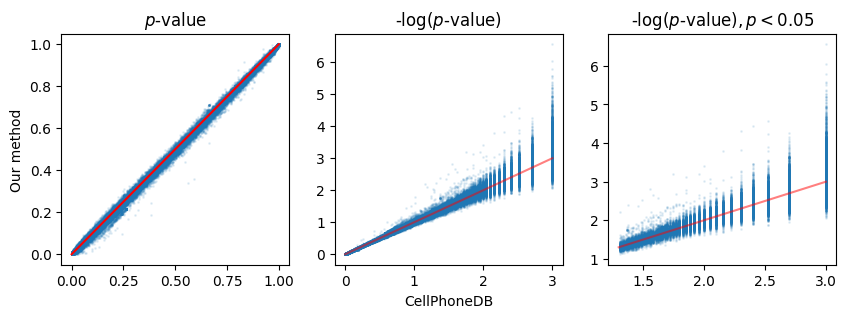

In [12]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

file = sorted(glob.glob('../../results/temp/*Quantile_0.9_Minimum_Arithmetic*.csv'))
interactions_strength = pd.read_csv(file[0], index_col=0, header=0)
percents_analysis = pd.read_csv(file[1], index_col=0, header=0)
pvals = pd.read_csv(file[2], index_col=0, header=0)

error = (
    interactions_strength.values - 
    pd.read_csv('../../data/example/1k_t20_qt/statistical_analysis_means_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print("Max error (compared with CPDB):",np.max(np.abs(error)))


# plt.style.use('science')
gt_df = pd.read_csv('../../data/example/1k_t20_qt/statistical_analysis_pvalues_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log10(pgt), -np.log10(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p$-value$)$')
plt.plot((0,3),(0,3), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log10(pgt[pgt<0.05]), -np.log10(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((1.3,3),(1.3,3), c='r', alpha=0.5)
plt.title('-$\log(p$-value$),p<0.05$')

Max error (compared with CPDB): 4.6801860209555457e-07


/tmp/ipykernel_527693/1427642171.py:30: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_527693/1427642171.py:30: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_527693/1427642171.py:35: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_527693/1427642171.py:35: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

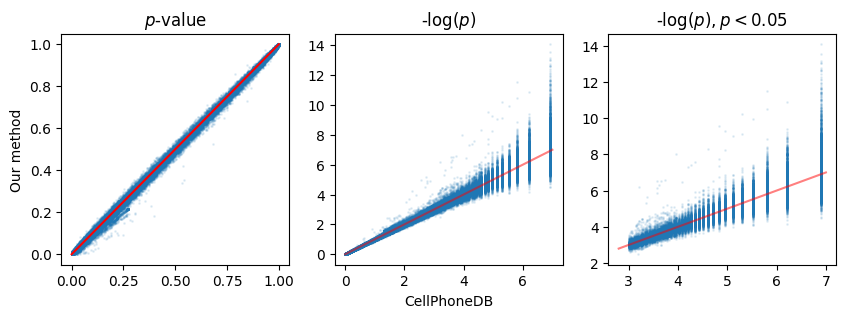

In [19]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

file = sorted(glob.glob('../../results/temp/*Quantile_0.9_Minimum_Geometric*.csv'))
interactions_strength = pd.read_csv(file[0], index_col=0, header=0)
percents_analysis = pd.read_csv(file[1], index_col=0, header=0)
pvals = pd.read_csv(file[2], index_col=0, header=0)

error = (
    interactions_strength.values - 
    pd.read_csv('../../data/example/1k_t20_qt_multiply/statistical_analysis_means_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print("Max error (compared with CPDB):",np.max(np.abs(error)))


# plt.style.use('science')
gt_df = pd.read_csv('../../data/example/1k_t20_qt_multiply/statistical_analysis_pvalues_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

## Single branch

In [6]:
interactions_strength, pvals, percents_analysis = fastccc.statistical_analysis_method(
    LRI_db_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type
)

2025-01-26 12:00:03 | INFO     | Task id is 644610.
2025-01-26 12:00:03 | INFO     | Results will be saved to "./results/".
2025-01-26 12:00:03 | INFO     | Directory already exists: ./results/
2025-01-26 12:00:04 | SUCCESS  | Data preprocessing done.
2025-01-26 12:00:04 | INFO     | Running:
-> Mean for single-unit summary function.
-> Minimum for multi-unit complex aggregation.
-> Arithmetic for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 12:00:30 | SUCCESS  | FastCCC calculation done.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    pd.read_csv('../../data/example/1k_t20/statistical_analysis_means_05_02_2024_144734.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

1.1733825684423493e-06


/tmp/ipykernel_1353698/696017428.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1353698/696017428.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1353698/696017428.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_1353698/696017428.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

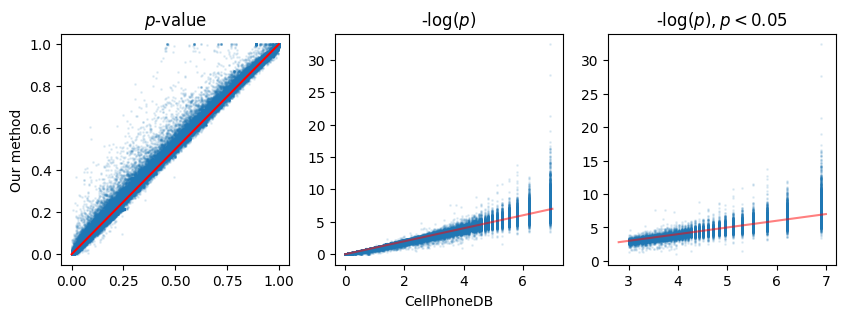

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

# plt.style.use('science')

gt_df = pd.read_csv('../../data/example/1k_t20/statistical_analysis_pvalues_05_02_2024_144734.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

In [4]:
interactions_strength, pvals, percents_analysis = fastccc.statistical_analysis_method(
    LRI_db_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    single_unit_summary = 'Quantile_0.9',
)

2025-01-26 09:01:53 | INFO     | Task id is 504f09.
2025-01-26 09:01:53 | INFO     | Results will be saved to "./results/".
2025-01-26 09:01:53 | INFO     | Directory already exists: ./results/
2025-01-26 09:01:54 | SUCCESS  | Data preprocessing done.
2025-01-26 09:01:54 | INFO     | Running:
-> Quantile_0.9 for single-unit summary function.
-> Minimum for multi-unit complex aggregation.
-> Arithmetic for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:02:14 | SUCCESS  | FastCCC calculation done.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    pd.read_csv('../../data/example/1k_t20_qt/statistical_analysis_means_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

4.1739654532690906e-07


/tmp/ipykernel_1371893/2070297676.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1371893/2070297676.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1371893/2070297676.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_1371893/2070297676.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

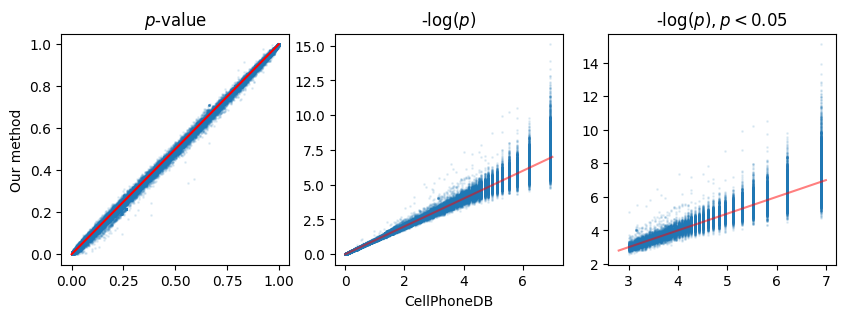

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

# plt.style.use('science')

gt_df = pd.read_csv('../../data/example/1k_t20_qt/statistical_analysis_pvalues_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

In [7]:
interactions_strength, pvals, percents_analysis = fastccc.statistical_analysis_method(
    LRI_db_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    single_unit_summary = 'Quantile_0.9',
    LR_combination = 'Geometric',
)

2025-01-26 09:07:09 | INFO     | Task id is 1de6e1.
2025-01-26 09:07:09 | INFO     | Results will be saved to "./results/".
2025-01-26 09:07:09 | INFO     | Directory already exists: ./results/
2025-01-26 09:07:10 | SUCCESS  | Data preprocessing done.
2025-01-26 09:07:10 | INFO     | Running:
-> Quantile_0.9 for single-unit summary function.
-> Minimum for multi-unit complex aggregation.
-> Geometric for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:07:42 | SUCCESS  | FastCCC calculation done.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    # pd.read_csv('./results/1k_t20/statistical_analysis_means_05_07_2024_113535.txt', sep='\t', index_col=0).iloc[:,10:].T.values - 
    pd.read_csv('../../data/example/1k_t20_qt_multiply/statistical_analysis_means_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

4.6801860209555457e-07


/tmp/ipykernel_1371893/1658328424.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1371893/1658328424.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_1371893/1658328424.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_1371893/1658328424.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

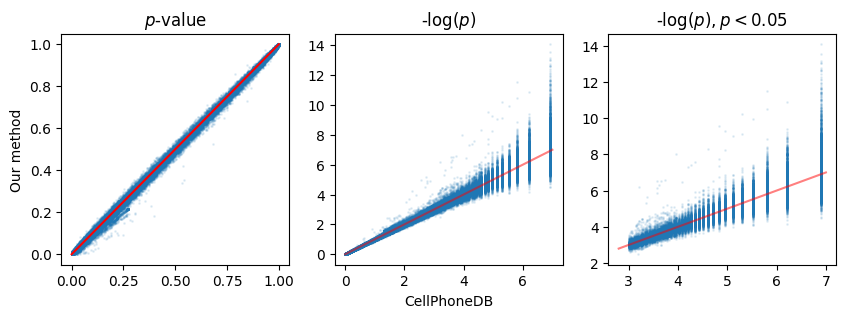

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

# plt.style.use('science')

gt_df = pd.read_csv('../../data/example/1k_t20_qt_multiply/statistical_analysis_pvalues_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

In [10]:
interactions_strength, pvals, percents_analysis = fastccc.statistical_analysis_method(
    LRI_db_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    single_unit_summary = 'Median',
    LR_combination = 'Geometric',
)

2025-01-26 09:08:59 | INFO     | Task id is 09e7dd.
2025-01-26 09:08:59 | INFO     | Results will be saved to "./results/".
2025-01-26 09:08:59 | INFO     | Directory already exists: ./results/
2025-01-26 09:08:59 | SUCCESS  | Data preprocessing done.
2025-01-26 09:08:59 | INFO     | Running:
-> Median for single-unit summary function.
-> Minimum for multi-unit complex aggregation.
-> Geometric for L-R combination to compute the CS.
-> Percentile is 0.5.
2025-01-26 09:09:06 | SUCCESS  | FastCCC calculation done.


In [12]:
LRI_db_file_path = './db/CPDBv4.1.0/'
meta_file_path = '../../data/example/metadata.tsv'
counts_file_path = '../../data/example/normalised_log_counts.h5ad'
convert_type = 'hgnc_symbol'

interactions_strength, pvals, percents_analysis = fastccc.statistical_analysis_method(
    cpdb_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    single_unit_summary = 'Mean',
    complex_aggregation = 'Minimum',
    LR_combination = 'Arithmetic'
)

2025-01-26 09:14:40 | INFO     | Task id is c4aac9.
2025-01-26 09:14:40 | INFO     | Results will be saved to "./results/".
2025-01-26 09:14:40 | INFO     | Directory already exists: ./results/
2025-01-26 09:14:41 | SUCCESS  | Data preprocessing done.
2025-01-26 09:14:41 | INFO     | Running:
-> Mean for single-unit summary function.
-> Minimum for multi-unit complex aggregation.
-> Arithmetic for L-R combination to compute the CS.
-> Percentile is 0.1.
2025-01-26 09:15:06 | SUCCESS  | FastCCC calculation done.
